# Comparing Canadian Living Wages - Project Proposal

## STAT 201 - Group 5

By Michael Guo, Joshua Liu, Samuel Leung

## Introduction



## Preliminary Results



In [51]:
install.packages("infer")
install.packages("tidyverse")
library(cowplot)
# library(datateachr)
# library(digest)
library(infer)
# library(repr)
# library(taxyvr)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [2]:
rentwage1990 <- read.csv('https://raw.githubusercontent.com/Guo-Michael/stat_201_project/main/rentwage1990.csv')
rentwage2021 <- read.csv('https://raw.githubusercontent.com/Guo-Michael/stat_201_project/main/rentwage2021.csv')

In [63]:
rentwage1990filtered <- rentwage1990 %>%
    select(year, city, province, min_wage, rent)

rentwage2021filtered <- rentwage2021 %>%
    select(year, city, province, min_wage, rent)

rentwage_bothyears <- bind_rows(rentwage1990filtered, rentwage2021filtered)

double_cities <- rentwage_bothyears %>%
    group_by(city) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n == 2) %>%
    pull(city)

rentwage_clean <- rentwage_bothyears %>%
    filter(city %in% double_cities) %>%
    select(-province) %>%
    mutate(living_ratio = (rent * 12 / 365) / (min_wage * 7)) %>%
    select(-min_wage, -rent) %>%
    mutate(year = ifelse(year == 1990, "year1990", "year2021")) %>%
    pivot_wider(names_from = year, values_from = living_ratio)

# test_stat <- rentwage_2021_clean %>%
#     mutate(diff_in_ratio = year2021 - year1990) %>%
#     summarize(test_stat = mean(diff_in_ratio)) %>%
#     pull()

# test_stat
rentwage_clean

city,year1990,year2021
<chr>,<dbl>,<dbl>
Gander,0.4298837,0.2250719
Grand Falls-Windsor,0.4608265,0.2438586
St. John's,0.5293427,0.3300564
Charlottetown,0.4070450,0.3063676
Summerside,0.3945205,0.2901099
Cape Breton,0.3579909,0.2716454
Halifax,0.5061970,0.3967691
New Glasgow,0.3705153,0.2495221
Truro,0.3840835,0.2636665


Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


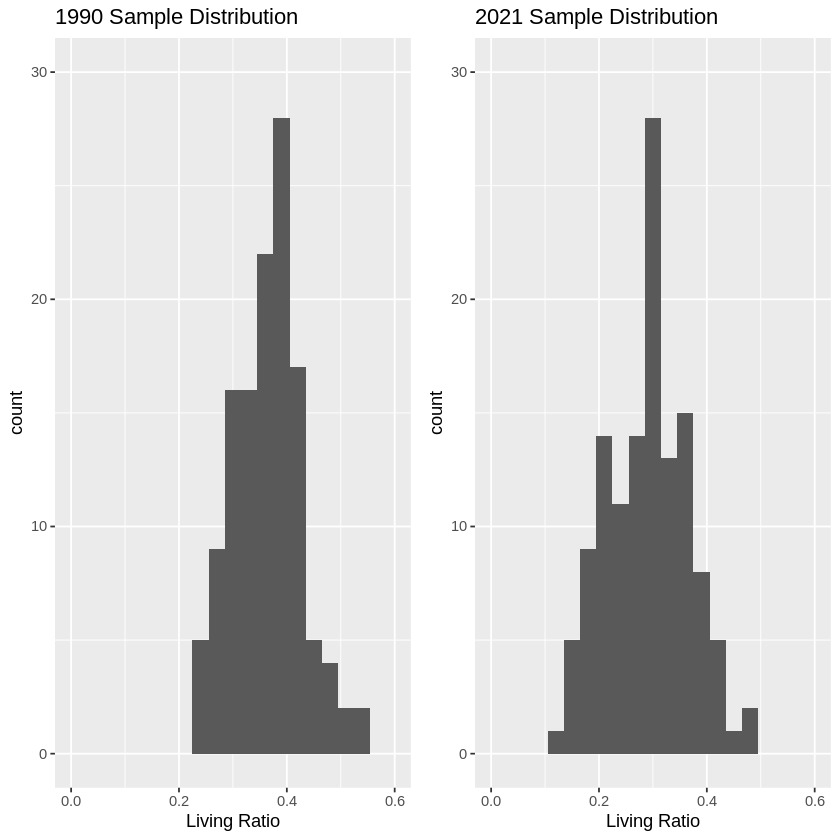

In [81]:
# prelim viz

sample_dist_2021 <- rentwage_clean %>%
    ggplot(aes(x = year2021)) +
    geom_histogram(binwidth = 0.03) +
    ggtitle("2021 Sample Distribution") +
    xlab("Living Ratio") +
    xlim(0, 0.6) +
    ylim(0, 30) 

sample_dist_1990 <- rentwage_clean %>%
    ggplot(aes(x = year1990)) +
    geom_histogram(binwidth = 0.03) +
    ggtitle("1990 Sample Distribution") +
    xlab("Living Ratio") +
    xlim(0, 0.6) +
    ylim(0, 30)

plots <- plot_grid(sample_dist_1990, sample_dist_2021)
plots

## Methods: Plan

The goal of this analysis is to discover if the cost of financial independence, measured by the ratio of minimum wage to rent, has increased in 2021 compared to 1990. Rent and minimum wage data is taken from reports from the Government of Canada, which demonstrates is reliability. We believe this ratio of rent to minimum wage, which we also call living ratio, is a reasonable assumption for cost of financial independence, as being able to afford personal housing is a common measure for independence. Minimum wage is a way to quantify earning power, and for the purposes of this analysis we believe this measure is reasonable for analysis.

The plots !!!

Specifically, our analysis focuses on determining the difference between the living ratios in 1990 and in 2021. Simply computing these statistics is insufficient, as we wouldn't know if any differences or similarities is due to chance or not. We instead use hypothesis testing to investigate this problem. Using the difference of the averages of the living ratios as the test statistic, we can perform a one-sample t-test with the null hypothesis being that there is no difference in the living ratio in 1990 and 2021, and the alternative hypothesis being that there is a difference in the living ratios. This can also be expressed using confidence intervals, to see if 0 is included in the interval constructed.

We recognize that the ratio of rent to wages is the division of two normal random variables, which results in a distribution that is not normal,. However, our test statistic is simply the average, and by Central Limit Theorem, we can assume that the average living ratio will come from a normal distribution given sufficient sample size. Therefore, we believe it is reasonable, given the size of our data, to perform a Z-test, as the T-distribution we expect to see would be extremely similar to a normal distribution.

!!!Bootstrap???

We would expect to find that the cost of financial independence has increased from 1990. !!!CHANGE THIS

!!!Impacts
    (Economic Analysis + Government Action???)
!!!Future Questions
    Pulling in other factors, model as yearly time series (out of scope for this course)
    

## References

!!!Josh you need two (scientific) references for your intro

!!!ALSO we need consistent format (APA)

Rent Data: https://open.canada.ca/data/en/dataset/1146388b-a150-4e70-98ec-eb40cb9083c8/resource/2be23210-9dd2-4511-840e-c467e0645827

Minimum Wages: http://srv116.services.gc.ca/dimt-wid/sm-mw/rpt2.aspx

hi I am joshua (hello I am Michael)
